# This notebook will be used for the Coursera Capstone Course project.

In [1]:
import pandas as pd
import numpy as np

print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Introduction/Business Problem

Police and first responders are looking for a model to help predict the severity of car accidents in order to better utilize their resources and more efficiently and effectively deploy personnel to each accident reported. In order to do so, they have hired a data scientist to analyze data compiled in Seattle City to see if there is a way to predict based on weather and road conditions in order to help better deploy resources, warn the public for high severity days, and ultimately save lives.

#### The question they have asked is: can you predict based on weather and road conditions the likely severity of a car accident?





# Data

The dataset used for this anaylsis is from the Seattle City Police Department and includes all of the collusions, as recorded by Traffic Records, from 2004 to present.

It includes 37 attributes and is labeled by severity of the accidents, describing the fatality of each accident. It includes: a severity, code 0 (unknown) to 3 (fatal), as well as the type of collision, # of people/objects involved, date/time of the accident, junction/lane type where the accident occured, road conditions, influence of the driver (attention, under the influence, speeding), and weather.

As weather and road conditions will help the police to send out public warnings or announcements to help caution drivers on days where more severe accidents are likely, the initial focus will be on these attributes.

To help further deploy appropriate resoureces, secondary considerations will be on the day/time of accident, junction type/crosswalk involvement, and the number of people/objects involved. If this information can be gathered from the initial accident report within a reasonable amount of time, it could further help the police to deploy appropriate types and amount of assistance to the scene of the accident. 

# Methodology

In beginning this project, we will first start be guided by the initial investigation request from the Police Department, to predict the severity of accidents based on weather and road conditions. We will determine the effects of these specific independent variables on the dependent variable, accident severity.

Upon reviewing the dataset and determining the makeup of the samples, we may need over-sampling or under-sampling methods to balance the dataset in order to avoid skewed model results. We will adjust the dataset accordingly using various data balancing techniques depending on the composition of the data identified.

We will review regressions to predict severity of collisions as well to determine if this can help our anaylsis and final modeling. We will also perform anaylsis using the visualization libraries of matplotlib and seaborn. We will use K Nearest Neighbor analysis to cluster coordinates as well as a decision tree to determine which model creates a more accurate predictor of the accident severity.
 
Finally, we will evaluate the accuracy and precision of the model with classification metrics and complete our results analysis portion of the report. We will also discuss further anaylsis that could be undertaken with this data if the Police Department would like to investigate additional aspects for deployment of resources to accidents beyond just notification of public for precautionary measures.

In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_25a75b0fe6734a97b285b33b88264068 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vUtWzKGYLQzFnOe6aTyrHJ4_db7aEKZh2dUJTQPzjb2P',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_25a75b0fe6734a97b285b33b88264068.get_object(Bucket='courseracapstone-donotdelete-pr-awppagh6tidzrr',Key='Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Seattle_Data = pd.read_csv(body)
# print(Seattle_Data.info)
print(Seattle_Data.head())

            X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO   STATUS  \
0 -122.356511  47.517361         1  327920     329420  3856094  Matched   
1 -122.361405  47.702064         2   46200      46200  1791736  Matched   
2 -122.317414  47.664028         3    1212       1212  3507861  Matched   
3 -122.318234  47.619927         4  327909     329409  EA03026  Matched   
4 -122.351724  47.560306         5  104900     104900  2671936  Matched   

       ADDRTYPE   INTKEY                                           LOCATION  \
0  Intersection  34911.0                      17TH AVE SW AND SW ROXBURY ST   
1         Block      NaN     HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW   
2         Block      NaN  ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...   
3  Intersection  29054.0                           11TH AVE E AND E JOHN ST   
4         Block      NaN  WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...   

   ... ROADCOND                LIGHTCOND PEDROWNOTGRNT SDOTCOLNUM SPEEDING

In [2]:
import numpy as np

#drop rows of data with 'weather', 'road condition', or 'severity code' blank
Seattle_Data.dropna(subset=["WEATHER"], axis=0, inplace=True)
Seattle_Data.dropna(subset=["ROADCOND"], axis=0, inplace=True)
Seattle_Data.dropna(subset=["SEVERITYCODE"], axis=0, inplace=True)

#Set index to ObjectID
Seattle_Data.set_index('OBJECTID')

#Create new dataframe with only the columns required for analysis
SD = Seattle_Data[['OBJECTID', 'WEATHER', 'SEVERITYCODE', 'ROADCOND']]

SD.head()
SD.info

<bound method DataFrame.info of         OBJECTID   WEATHER SEVERITYCODE ROADCOND
0              1     Clear            1      Dry
1              2   Raining            1      Wet
2              3     Clear            2      Dry
3              4   Raining            2      Wet
4              5     Clear            2      Ice
5              6     Clear            1      Dry
6              7  Overcast            1      Dry
7              8     Clear            1      Dry
8              9     Clear           2b      Dry
9             10     Clear            1      Wet
11            12     Clear            1      Dry
12            13     Clear            2      Dry
13            14     Clear            2      Dry
14            15   Unknown            1  Unknown
15            16     Clear            2      Dry
16            17     Clear            1      Dry
17            18   Unknown            1  Unknown
19            20  Overcast            1      Dry
20            21   Raining           

After the initial import of the full dataset, a secondary dataset was created containing only the fields required for the initial analysis requested by the Police Department: independent variables of weather and road condition, dependent variable of accident severity code, as well as the object ID for line item identification.

#### Data preparation

Below are the initial data preparation procedures performed in order to remove line items with blank or inconclusive data (unknown fields, 'other' fields, etc.).

In [3]:
SD["SEVERITYCODE"].value_counts()

1     133818
2      57829
2b      3058
3        339
0          2
Name: SEVERITYCODE, dtype: int64

In [4]:
SD.WEATHER.unique()

array(['Clear', 'Raining', 'Overcast', 'Unknown', 'Other', 'Snowing',
       'Sleet/Hail/Freezing Rain', 'Fog/Smog/Smoke', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [5]:
SD["WEATHER"].value_counts()

Clear                       114788
Raining                      34034
Overcast                     28543
Unknown                      15120
Snowing                        919
Other                          858
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               55
Severe Crosswind                26
Partly Cloudy                   10
Name: WEATHER, dtype: int64

In [6]:
# Drop any line items with a value of 'unknown' or 'other' in our independent variables as this will skew the data analysis.
# Therefore, in the final model, it will be required that the user has information on the key independent variables in order for the model to be utilized.
SD.drop(SD.index[SD['WEATHER'] == 'Unknown'], inplace = True)
SD.drop(SD.index[SD['WEATHER'] == 'Other'], inplace = True)


SD.WEATHER.unique()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


array(['Clear', 'Raining', 'Overcast', 'Snowing',
       'Sleet/Hail/Freezing Rain', 'Fog/Smog/Smoke', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [7]:
# Drop any line items with a value of 'unknown' or 'other' in our independent variables as this will skew the data analysis.
# Therefore, in the final model, it will be required that the user has information on the key independent variables in order for the model to be utilized.SD.drop(SD.index[SD['ROADCOND'] == 'Unknown'], inplace = True)
SD.drop(SD.index[SD['ROADCOND'] == 'Other'], inplace = True)
SD.drop(SD.index[SD['ROADCOND'] == 'Unknown'], inplace = True)

SD.ROADCOND.unique()

array(['Dry', 'Wet', 'Ice', 'Snow/Slush', 'Standing Water',
       'Sand/Mud/Dirt', 'Oil'], dtype=object)

In [8]:
SD["ROADCOND"].value_counts()

Dry               127531
Wet                48203
Ice                 1136
Snow/Slush           911
Standing Water       112
Sand/Mud/Dirt         67
Oil                   60
Name: ROADCOND, dtype: int64

In [11]:
# Drop any line items with a value of '0' (which indicates 'unknown') in our dependent variable as this line item will not assist with training the model.

SD.SEVERITYCODE.unique()

array(['1', '2', '2b', '3', '0'], dtype=object)

To help us better understand the data, a bar graph was created to examine the types of collisions (those causing only property damage vs. those causing differing levels of injury) compared to the weather. 

Text(0, 0.5, 'Number of Observations')

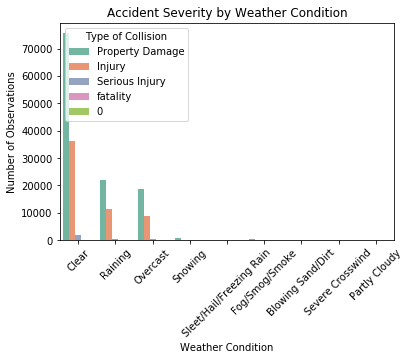

In [12]:
# Understanding data by looking at how many accidents cause property damage vs. injury and in what weather conditions
import seaborn as sns
import matplotlib.pyplot as plt
df_InjuryType= SD[['WEATHER', 'SEVERITYCODE']].copy()
codes = {'1': 'Property Damage', '2': 'Injury', '2b': 'Serious Injury', '3': 'fatality'}
df_InjuryType['Type of Collision'] = df_InjuryType['SEVERITYCODE'].replace(codes)

ax = sns.countplot(
    data=df_InjuryType,
    x='WEATHER',
    hue='Type of Collision',
    palette='Set2'
)

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45
)

ax.grid(False)
ax.set_title('Accident Severity by Weather Condition')
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Number of Observations')

In [ ]:
# Understanding data by looking at how many accidents cause property damage vs. injury and in what road conditions.
df_InjuryType= SD[['ROADCOND', 'SEVERITYCODE']].copy()
codes = {'1': 'Property Damage', '2': 'Injury', '2b': 'Serious Injury', '3': 'fatality'}
df_InjuryType['Type of Collision'] = df_InjuryType['SEVERITYCODE'].replace(codes)

ax = sns.countplot(
    data=df_InjuryType,
    x='ROADCOND',
    hue='Type of Collision',
    palette='Set2'
)

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45
)

ax.grid(False)
ax.set_title('Accident Severity by Road Condition')
ax.set_xlabel('Road Condition')
ax.set_ylabel('Number of Observations')


Based on the bar graph created above, it was noted that most of the accidents cause property damage rather than injury. In addition, a large majority of the accidents are actually occuring on clear weather days rather than the anticipated hypothesis of bad weather increasing the likelihood of accident occurence. This suggests that drivers may already be applying caution or avoiding the roads on bad weather days and/or are letting down their guard on clear weather days.

For further anaylsis, additional data preparation procedures were completed to change fields into numeric data as required by KNN an Decision Tree analysis.

In [43]:
# Assign number values to the Weather and Road Condition columns according to severity of condition
# Change the 'SEVERITYCODE' variable to a 1-4 scale
weather_map = {'Clear': 0, 'Partly Cloudy': 1, 'Overcast': 2, 'Raining': 3, 'Fog/Smog/Smoke': 4, 'Blowing Sand/Dirt': 5, 'Sleet/Hail/Freezing Rain': 6, 'Snowing': 7, 'Severe Crosswind': 8}
road_map = {'Dry': 0, 'Wet': 1, 'Sand/Mud/Dirt': 2, 'Standing Water': 3, 'Snow/Slush': 4, 'Oil': 5, 'Ice': 6}
severity_map = {'1': 1, '2': 2, '2b': 3, '3': 4}

SD_New = SD.replace({'WEATHER': weather_map, 'ROADCOND': road_map, 'SEVERITYCODE': severity_map})
SD_New.head()

,OBJECTID,WEATHER,SEVERITYCODE,ROADCOND
0,1,0,1,0
1,2,3,1,1
2,3,0,2,0
3,4,3,2,1
4,5,0,2,6


In [44]:
SD_New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178020 entries, 0 to 221737
Data columns (total 4 columns):
OBJECTID        178020 non-null int64
WEATHER         178020 non-null int64
SEVERITYCODE    178020 non-null int64
ROADCOND        178020 non-null int64
dtypes: int64(4)
memory usage: 6.8 MB


In [45]:
SD_New.SEVERITYCODE.unique()


array([1, 2, 3, 4, 0])

In [46]:
SD_New["SEVERITYCODE"].value_counts()

1    117943
2     56734
3      3007
4       334
0         2
Name: SEVERITYCODE, dtype: int64

In [47]:
df_InjuryType.head()


,WEATHER,SEVERITYCODE,Type of Collision
0,Clear,1,Property Damage
1,Raining,1,Property Damage
2,Clear,2,Injury
3,Raining,2,Injury
4,Clear,2,Injury


As the dataset was noted to be imbalanced, data balancing was completed to increase the number of accidents in the minority category (fatalities) and decrease the number of accidents in the najority categories (property damage and minor injuries).  

In [48]:
# Balancing the Dataset is required for proper anaysis
# First, we will separate the dataset into one dataset for each accident severity level

from sklearn.utils import resample

df_sev1 = SD_New[SD_New.SEVERITYCODE==1]
df_sev2 = SD_New[SD_New.SEVERITYCODE==2]
df_sev3 = SD_New[SD_New.SEVERITYCODE==3]
df_sev4 = SD_New[SD_New.SEVERITYCODE==4]

# Second, we will resample the majority datasets of severity levels 1 and 2 to reduce the number of low severity accidents in our dataset
df_sev1_downsampled = resample(df_sev1, replace=False, n_samples=10000, random_state=123)   

df_sev2_downsampled = resample(df_sev2, 
                                 replace=False,      # sample without replacement
                                 n_samples=3000,     # to match minority class
                                 random_state=123)   # reproducible results

# Third, we will resample the minority dataset of severity level 4 to increase the number of high severity accidents in our dataset
df_sev4_upsampled = resample(df_sev4, replace=True, n_samples=1000, random_state=123)

# Next, we will combine the original severity 3 dataset with the downsampled severity 1 and 2 datasets and the upsampled severity 4 dataset
df_resampled = pd.concat([df_sev1_downsampled, df_sev2_downsampled, df_sev3, df_sev4_upsampled])

df_resampled["SEVERITYCODE"].value_counts()

1    10000
3     3007
2     3000
4     1000
Name: SEVERITYCODE, dtype: int64

Analysis then began using KNN and decision tree analysis to create models that could be trained and tested for accuracy.

In [49]:
import matplotlib.pyplot as plt
from scipy import stats

#X = df_downsampled[['WEATHER', 'ROADCOND']]

pearson_coef, p_value = stats.pearsonr(df_resampled['ROADCOND'], df_resampled['SEVERITYCODE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.0444215872058114  with a P-value of P = 6.8120536353822145e-09


In [50]:
df_resampled[["WEATHER", "ROADCOND", "SEVERITYCODE"]].corr()

,WEATHER,ROADCOND,SEVERITYCODE
WEATHER,1.000000,0.585937,-0.024221
ROADCOND,0.585937,1.000000,-0.044422
SEVERITYCODE,-0.024221,-0.044422,1.000000


In [66]:
# KNN analysis
X = df_resampled[['WEATHER', 'ROADCOND']] .values  #.astype(float)
X[0:5]

y = df_resampled['SEVERITYCODE'].values
y[0:5]
    
    
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
k = 15
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
knn

yhat = knn.predict(X_test)
yhat[0:5]

# Determine the accuracy of the training and testing set using the KNN model
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Train set: (13605, 2) (13605,)
Test set: (3402, 2) (3402,)
Train set Accuracy:  0.5631018008085262
Test set Accuracy:  0.5640799529688418


In [67]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.20458554, 0.33862434, 0.33862434, 0.33862434, 0.5893592 ,
       0.31393298, 0.5643739 , 0.5643739 , 0.56407995, 0.56407995,
       0.58877131, 0.56407995, 0.56407995, 0.56407995, 0.56407995,
       0.56407995, 0.56407995, 0.56407995, 0.56407995])

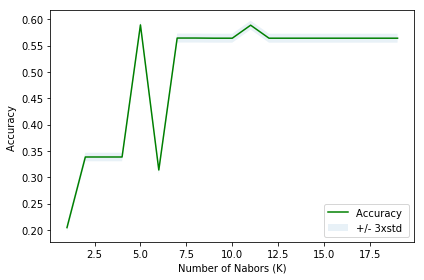

In [68]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [69]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5893592004703115 with k= 5


In [52]:
# Decision Tree Method
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

print ("The X_trainset shape is:", X_trainset.shape)

print ("The y_trainset shape is:", y_trainset.shape)


The X_trainset shape is: (11904, 2)
The y_trainset shape is: (11904,)


In [53]:
print ("The X_trainset shape is:", X_testset.shape)

print ("The X_trainset shape is:", y_testset.shape)

The X_trainset shape is: (5103, 2)
The X_trainset shape is: (5103,)


In [54]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
dt.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
predTree = dt.predict(X_testset)

In [57]:
print (predTree [0:5])
print (y_testset [0:5])

[1 1 1 1 1]
[1 1 1 3 1]


In [70]:
# Determine the accuracy of the training and testing set using the Decision Tree model
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.5853419557123261


## Conclusion

Based on the dataset used and our evaluation of the model accuracy and precision of the model, it was determined that the KNN model created was the most accurate way to classify severity of accidents based on weather and road conditions. With an accuracy of 58.9%, the particular weather and road conditions only have somewhat of an impact on whether or not travel could result in property damage or variuos levels of injury. In addition, based on analysis of the data, the Police Department may be interested to learn that the majority of accidents already occur on clear weather days. This suggests that drivers may already be applying caution or avoiding the roads on bad weather/road condition days and/or are letting down their guard on clear weather days. This may be useful in the type of public messaging they would like to pursue to reduce accidents.

Further alalysis that could be undertaken with this data if the Police Department would like to investigate additional aspects for deployment of resources to accidents beyond just notification of public for precautionary measures.